# Data Analysis with Python

In [3]:
import pandas as pd
import glob
import matplotlib as plt
import os

#### Merging Separate file into one file

In [4]:
# Directory path containing CSV files:
directory_path = "./SalesAnalysis/Sales_Data"

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"Directory '{directory_path}' not found.")
    # Handle the case where the directory doesn't exist

# Creation of a list of all CSV file paths within the directory:
file_paths = glob.glob(os.path.join(directory_path, "*.csv"))

# Check if there are any CSV files in the directory
if not file_paths:
    print(f"No CSV files found in the directory '{directory_path}'.")
    # Handle the case where no CSV files are found

dataframes = []
for path in file_paths:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(path)
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv("combined_sales.csv", index=False)


In [5]:
df = pd.read_csv("combined_sales.csv")

#### Removing NaN Values

In [6]:
#Checking Whether there are any null values present
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
#Delete all the null values
df = df.dropna()

In [8]:
df.isnull().sum() #Confirming

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Question: What was the best month for sales? How much was earned that month?

In [9]:
#ValueErro occured: invalid literal for int() with base 10: 'Or'
#Error Solved :
df = df[df['Order Date'].str[0:2]!='Or']

In [10]:
#Adding a month column from Order Date
df["Month"]= df["Order Date"].str[0:2]

#Converting Month string into int
df["Month"]=df["Month"].astype("int") 

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
#Changing the datatype for the convenience of calculations
df["Quantity Ordered"]=df["Quantity Ordered"].astype("int")
df["Price Each"]=df["Price Each"].astype("float")

In [12]:
#Adding a "Price" column 
df["Sales"]=df["Price Each"] * df["Quantity Ordered"]

In [13]:
result=df.groupby('Month').sum()

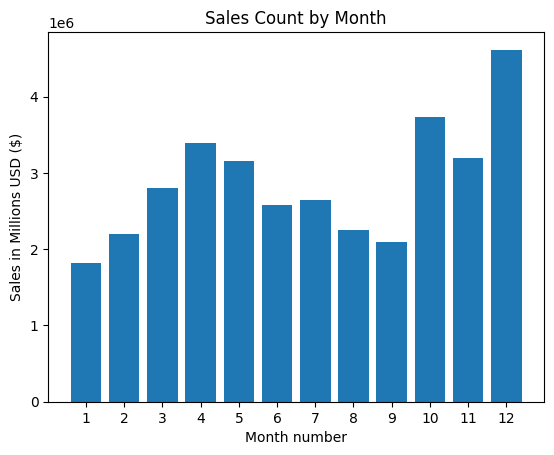

In [14]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Millions USD ($)')
plt.xlabel('Month number')
plt.title("Sales Count by Month")
plt.show()

#### From the "Sales Count by Month" Chart we can see that in December we have maximum sales.

## Question: Which city has the maximum number of sales

In [180]:
#To extract city from the Address we have to consider using apply method as it will apply on entire column

In [15]:
# Defining a function to extract the city from the given address
def get_city(address):
    # Splitting the address by commas and getting the second part, then removing leading and trailing spaces
    return address.split(",")[1].strip(" ")

# Defining a function to extract the state from the given address
def get_state(address):
    # Splitting the address by commas, getting the third part, then splitting by spaces and getting the second part
    return address.split(",")[2].split(" ")[1]

# Applying the defined functions to the 'Purchase Address' column in the DataFrame
# Combining the extracted city and state information into a formatted string and creating a new 'City' column
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

# Displaying the first few rows of the DataFrame with the new 'City' column
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [16]:
new_result=df.groupby('City').sum()['Sales']

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


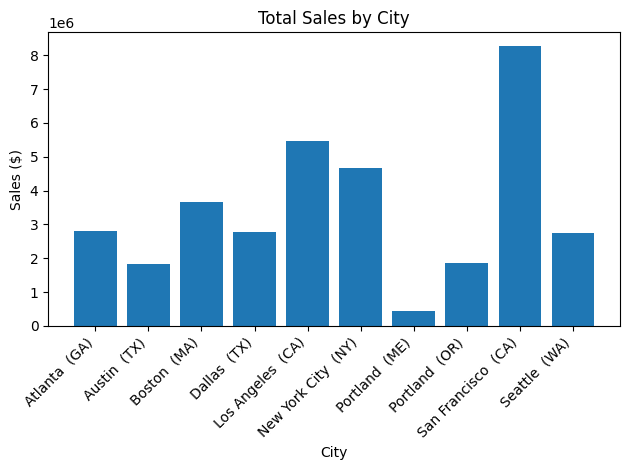

In [18]:
import matplotlib.pyplot as plt
# Converting 'City' column to strings
df['City'] = df['City'].astype(str)

# Grouping by City and summing the Sales for each city
# Here, city_sales acts like an independent small table which we can use for the calculation
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# Plotting the bar chart
plt.bar(city_sales['City'], city_sales['Sales'])
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.title('Total Sales by City')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()

# Displaying the plot
plt.show()


#### As we can see in "Total Sales by City" chart San Francisco (CA) has the maximum number of sales

## Question: What time should we display advertisements to maximize likelihood of customer's buying product?

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
#Checking the datatype 
df['Order Date'].dtype 

dtype('O')

In [34]:

# Assuming the date format is 'yyyy-mm-dd HH:MM:SS'
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %H:%M:%S')

# Extracting hours and minutes into separate columns
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1


In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


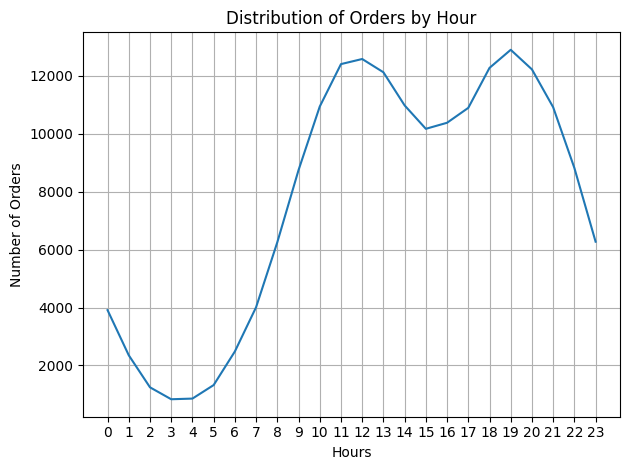

In [38]:
# Grouping by Hour and counting the Orders for each hour
# Here, Hrwise acts like an independent small table which we can use for the calculation
HourlyCount = df.groupby('Hour')['Count'].count().reset_index()

# Plotting the line chart to visualize the distribution of orders throughout the day
plt.plot(HourlyCount['Hour'], HourlyCount['Count'])
plt.xlabel('Hours')
plt.xticks((HourlyCount['Hour']))
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour')
plt.tight_layout()

# Displaying the line chart
plt.grid()
plt.show()


#### My recommendation is slightly before 11am or 7pm


In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


## Question 4: What products are most often sold together?

In [25]:
df["Order ID"]=df["Order ID"].astype("int")
#checking duplicate order ids
df2=df[df["Order ID"].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [28]:
# Selecting rows where 'Order ID' appears more than once in the DataFrame
# This helps identify duplicate 'Order ID' entries
df_duplicates = df[df['Order ID'].duplicated(keep=False)].copy()

# Creating a new 'Grouped' column by concatenating 'Product' values for each 'Order ID'
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df_duplicates['Grouped'] = df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Creating a new DataFrame 'df_grouped' with unique 'Order ID' and corresponding concatenated 'Product' values
df_grouped = df_duplicates[['Order ID', 'Grouped']].drop_duplicates()


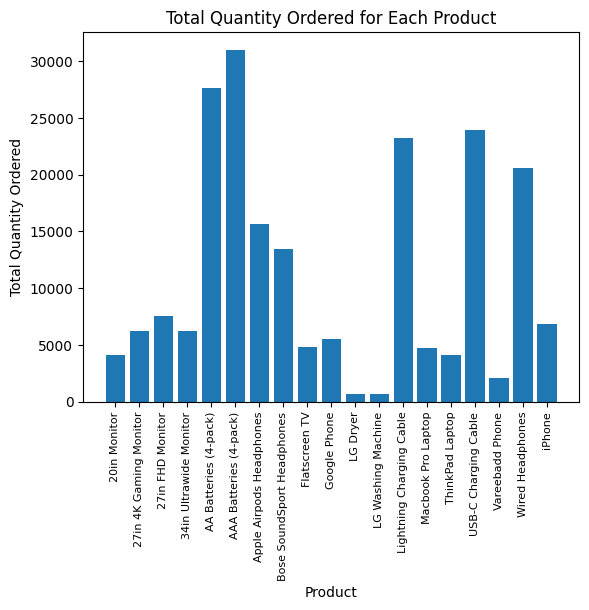

In [30]:

# Assuming 'df' is your DataFrame containing the relevant data

# Making sure 'Quantity Ordered' is a numeric column
# Coercing non-numeric values to NaN
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Grouping by 'Product' and summing the 'Quantity Ordered'
product_group = df.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Extracting product names and plotting the bar chart
keys = list(quantity_ordered.index)
plt.bar(keys, quantity_ordered)

# Customizing the plot appearance
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered for Each Product')

# Displaying the bar chart
plt.show()



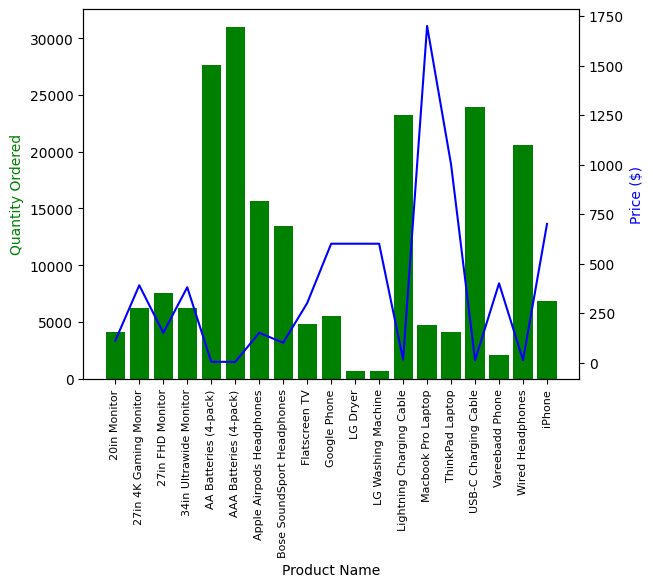

In [31]:


# Assuming 'Price Each' is the column containing prices and needs to be converted to numeric
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Group by 'Product' and calculate the mean of 'Price Each'
prices = df.groupby('Product')['Price Each'].mean()

# Assuming keys and quantity_ordered are already defined
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Corrected the usage of set_xticks and set_xticklabels
ax1.set_xticks(keys)
ax1.set_xticklabels(keys, rotation='vertical', size=8)

# Use plt.show() instead of fig.show()
plt.show()


#### AA Batteries and AAA Batteries are bought more than any other product. A potential reason that I can see her is because the prices of both products are cheaper than the rest.